In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import random
import mofr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, mean_squared_log_error)
from xgboost import XGBRegressor, plot_tree
import math

import xgboost as xgb

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
C:\

In [3]:
seed=1234

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Data Exploration

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Predictor checking

# Data transformations

In [10]:
col_target='SalePrice'
col_exclude=[
'Id',
col_target
]

## Categorical transformations

In [11]:
import category_encoders as ce

In [12]:
# potential predictors without encoding
cat_preds = [col for col in train.select_dtypes(include="object") if col not in col_exclude]
bool_preds = [col for col in train.select_dtypes(include="bool") if col not in col_exclude]
datetime_preds = [col for col in train.select_dtypes(include="datetime") if col not in col_exclude]

In [13]:
# bayesian target encoding
encoder = ce.TargetEncoder(min_samples_leaf=1, smoothing=1.0)
encoder.fit_transform(train[cat_preds], train[col_target])

train = pd.concat([train, encoder.transform(train[cat_preds]).add_prefix("BAYES_")], axis=1)
test = pd.concat([test, encoder.transform(test[cat_preds]).add_prefix("BAYES_")], axis=1)

# Fitting models

In [14]:
col_preds=[col for col in train.select_dtypes(include=["int","float"]) if col!=col_target]

In [15]:
(train[col_target]>0).value_counts()

True    1460
Name: SalePrice, dtype: int64

In [16]:
results=[]
for col in col_preds:
    results.append((col, np.square(mean_squared_log_error(train[col_target], train[col].fillna(np.mean(train[col]))))))

pd.DataFrame(results, columns=['Predictor', 'GINI']).sort_values(by='GINI', ascending=True)

,Predictor,GINI
45,BAYES_Neighborhood,0.004884
55,BAYES_ExterQual,0.007699
58,BAYES_BsmtQual,0.007957
67,BAYES_KitchenQual,0.008096
71,BAYES_GarageFinish,0.010278
...,...,...
34,MiscVal,19809.291398
15,LowQualFinSF,20431.189464
31,3SsnPorch,20476.877372
18,BsmtHalfBath,20683.175998


## XGBoost model

In [17]:
train_rmse=[]
valid_rmse=[]
oot_rmse=[]

n=1
X_train, X_valid, y_train, y_valid= train_test_split(train[0:1200], train[col_target][0:1200], test_size=0.2, random_state=seed)
train['FINAL_SCORE_AVG']=0
X_train['FINAL_SCORE_AVG']=0
X_valid['FINAL_SCORE_AVG']=0
test['FINAL_SCORE_AVG']=0

train = train.sample(frac=1).reset_index(drop=True)
#test = test.sample(frac=1).reset_index(drop=True)


for random_seed in range(100):
    X_train, X_valid, y_train, y_valid= train_test_split(train[0:1200], train[col_target][0:1200], test_size=0.2, random_state=random_seed)

    xgb_model = XGBRegressor(max_depth=2, seed=random_seed, colsample_bytree=0.5, gamma=1, min_child_weight=5, n_estimators=20)
    xgb_model.fit(X_train.loc[:, col_preds], X_train[col_target], verbose=0, eval_metric='logloss')
    

    train['FINAL_SCORE'] =xgb_model.predict(train[col_preds])
    X_train['FINAL_SCORE'] =xgb_model.predict(X_train[col_preds])
    X_valid['FINAL_SCORE'] = xgb_model.predict(X_valid[col_preds])
    test['FINAL_SCORE'] =xgb_model.predict(test[col_preds])

        
    train['FINAL_SCORE_AVG'] =(train['FINAL_SCORE_AVG']*n+ xgb_model.predict(train[col_preds]))/(n+1)
    X_train['FINAL_SCORE_AVG'] =(X_train['FINAL_SCORE_AVG']*n+xgb_model.predict(X_train[col_preds]))/(n+1)
    X_valid['FINAL_SCORE_AVG'] = (X_valid['FINAL_SCORE_AVG']*n+xgb_model.predict(X_valid[col_preds]))/(n+1)
    test['FINAL_SCORE_AVG'] = (test['FINAL_SCORE_AVG']*n+xgb_model.predict(test[col_preds]))/(n+1)  
    n+=1 

    train_rmse.append(math.sqrt(mean_squared_log_error(X_train[col_target], X_train['FINAL_SCORE'])))
    valid_rmse.append(math.sqrt(mean_squared_log_error(X_valid[col_target], X_valid['FINAL_SCORE'])))
    oot_rmse.append(math.sqrt(mean_squared_log_error(train[col_target][1200:-1], train['FINAL_SCORE'][1200:-1])))

In [18]:
np.std(oot_rmse)

0.00450331282295213

In [19]:
# print('The Lift on the whole set is: '+ str(np.mean(whole_lifts)))
# print('The gini on the whole set is: '+ str(np.mean(whole_ginis)))
# print('\n')
print('The average rmse on the train set is: '+ str(np.mean(train_rmse)))
print('\n')
print('The average rmse on the valid set is: '+ str(np.mean(valid_rmse)))
print('\n')
print('The average rmse on the oot set is: '+ str(np.mean(oot_rmse)))

The average rmse on the train set is: 0.13347302104471992


The average rmse on the valid set is: 0.15496695699586704


The average rmse on the oot set is: 0.1690992925696387


In [20]:
# print('The Lift on the whole set is: '+ str(np.mean(whole_lifts)))
# print('The gini on the whole set is: '+ str(np.mean(whole_ginis)))
# print('\n')
print('The rmse on the train set is: '+ str(math.sqrt(mean_squared_log_error(X_train[col_target], X_train['FINAL_SCORE']))))
print('\n')
print('The rmse on the valid set is: '+ str(math.sqrt(mean_squared_log_error(X_valid[col_target], X_valid['FINAL_SCORE']))))
print('\n')
print('The rmse on the oot set is: '+ str(math.sqrt(mean_squared_log_error(train[col_target][1000:-1], train['FINAL_SCORE'][1000:-1]))))

The rmse on the train set is: 0.12746620387706795


The rmse on the valid set is: 0.17641387155265129


The rmse on the oot set is: 0.15261603566258977


In [21]:
test['SalePrice']=test['FINAL_SCORE_AVG']

In [22]:
test[['Id', 'SalePrice']].to_csv('Prediction_xgb_avg.csv', index=False)

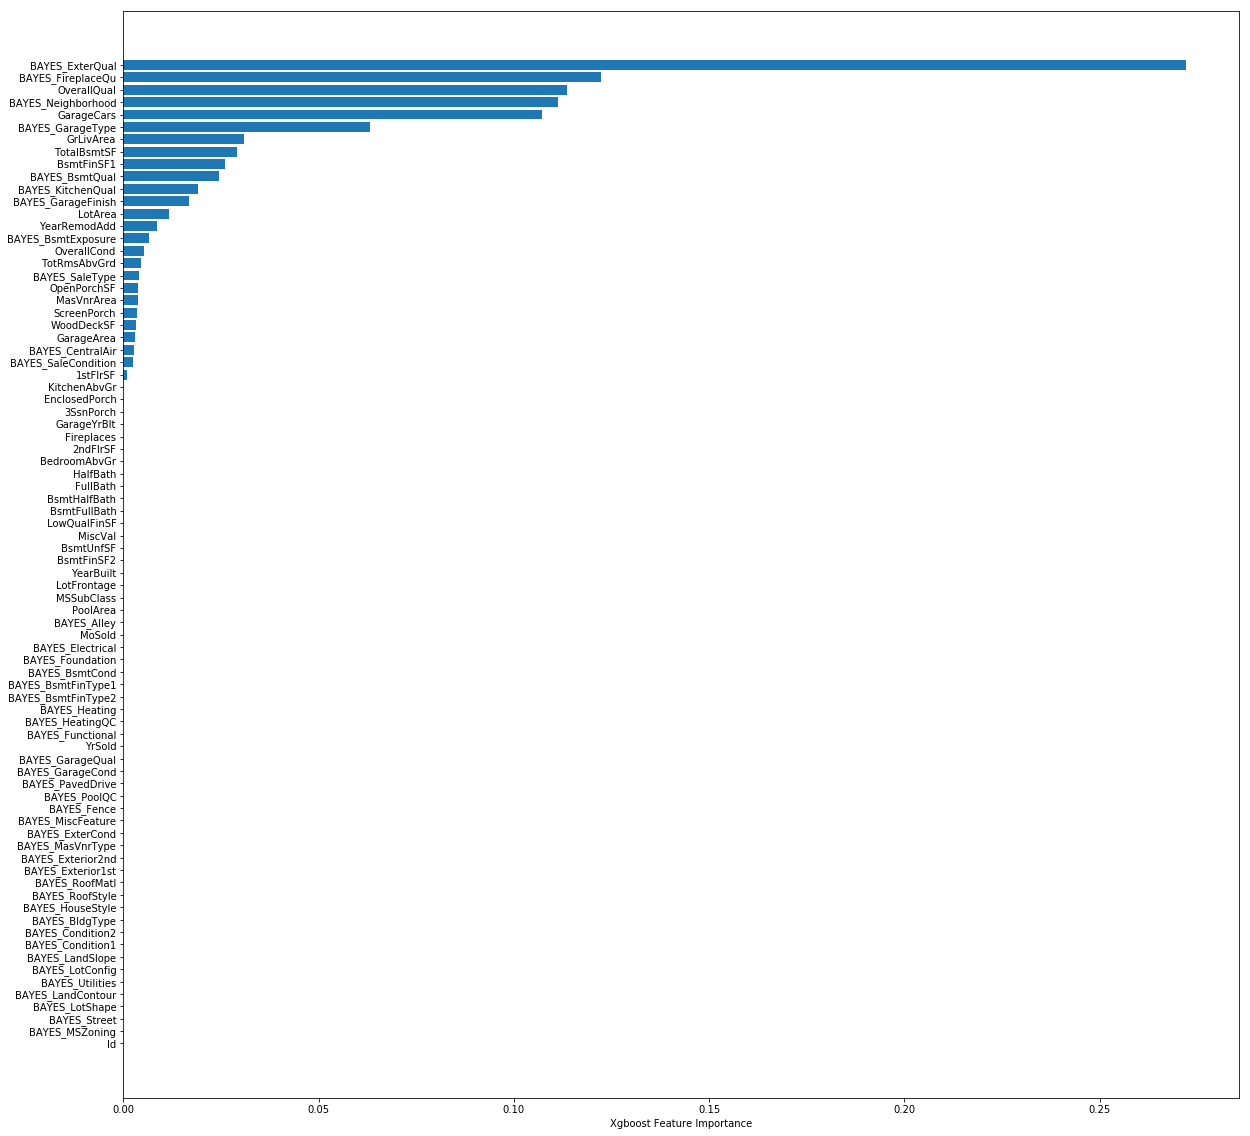

In [23]:
sorted_idx = xgb_model.feature_importances_.argsort()
order_ = []
for i in sorted_idx:
  order_.append(col_preds[i])
plt.figure(figsize=(20, 20))
fig = plt.barh(order_, xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

## Neural network model

In [24]:
len(col_preds)

80

In [25]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    
    layers.BatchNormalization(input_shape=[len(col_preds)]), #instead of preprocessing with sklearn

    # the hidden ReLU layers
    #layers.Dropout(rate=0.6), # apply 10% dropout to the next layer (to avoid overfitting)
    layers.Dense(units=500, activation='relu'),
    layers.BatchNormalization(), #instead of preprocessing with sklearn
    #layers.Dropout(rate=0.6), # apply 10% dropout to the next layer (to avoid overfitting)
    layers.Dense(units=500, activation='relu'),
    layers.BatchNormalization(),
    # the linear output layer 
    layers.Dense(units=1), #activation='sigmoid' for binary problems
])

In [26]:
model.compile(
    optimizer='adam',
    loss='mae', #change to 'mae' or 'mse' for regression problems
)

In [27]:
history = model.fit(
    X_train[col_preds].fillna(100), X_train[col_target].fillna(100),
    validation_data=(X_valid[col_preds].fillna(100), X_valid[col_target].fillna(100)),
    batch_size=100,
    #callbacks=[early_stopping], # put your callbacks in a list
    epochs=100,
    verbose=1, # suppress output since we'll plot the curves
)

Epoch 1/1000
10/10 [==============================] - 1s 26ms/step - loss: 181028.5625 - val_loss: 177292.7812
Epoch 2/1000
10/10 [==============================] - 0s 9ms/step - loss: 181028.1875 - val_loss: 177272.5781
Epoch 3/1000
10/10 [==============================] - 0s 9ms/step - loss: 181027.6875 - val_loss: 177262.0312
Epoch 4/1000
10/10 [==============================] - 0s 10ms/step - loss: 181027.0000 - val_loss: 177259.5781
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: 181026.1406 - val_loss: 177302.9062
Epoch 6/1000
10/10 [==============================] - 0s 9ms/step - loss: 181025.0469 - val_loss: 177274.6406
Epoch 7/1000
10/10 [==============================] - 0s 9ms/step - loss: 181023.7344 - val_loss: 177285.3281
Epoch 8/1000
10/10 [==============================] - 0s 9ms/step - loss: 181022.1875 - val_loss: 177282.7656
Epoch 9/1000
10/10 [==============================] - 0s 8ms/step - loss: 181020.4062 - val_loss: 177350.0000
Epoch 1

10/10 [==============================] - 0s 13ms/step - loss: 180340.0625 - val_loss: 174526.2344
Epoch 75/1000
10/10 [==============================] - 0s 13ms/step - loss: 180321.5156 - val_loss: 174503.8594
Epoch 76/1000
10/10 [==============================] - 0s 13ms/step - loss: 180302.7188 - val_loss: 174662.6875
Epoch 77/1000
10/10 [==============================] - 0s 12ms/step - loss: 180283.7344 - val_loss: 174581.9219
Epoch 78/1000
10/10 [==============================] - 0s 13ms/step - loss: 180264.5156 - val_loss: 174653.7969
Epoch 79/1000
10/10 [==============================] - 0s 13ms/step - loss: 180245.0625 - val_loss: 174862.9531
Epoch 80/1000
10/10 [==============================] - 0s 12ms/step - loss: 180225.3906 - val_loss: 175068.7500
Epoch 81/1000
10/10 [==============================] - 0s 11ms/step - loss: 180205.4688 - val_loss: 175767.1562
Epoch 82/1000
10/10 [==============================] - 0s 10ms/step - loss: 180185.3594 - val_loss: 175987.0312
Epoch 

Epoch 147/1000
10/10 [==============================] - 0s 10ms/step - loss: 178438.5469 - val_loss: 177515.7344
Epoch 148/1000
10/10 [==============================] - 0s 9ms/step - loss: 178405.3906 - val_loss: 177473.7812
Epoch 149/1000
10/10 [==============================] - 0s 9ms/step - loss: 178372.0312 - val_loss: 177434.2188
Epoch 150/1000
10/10 [==============================] - 0s 9ms/step - loss: 178338.4844 - val_loss: 177398.7188
Epoch 151/1000
10/10 [==============================] - 0s 9ms/step - loss: 178304.7812 - val_loss: 177364.4375
Epoch 152/1000
10/10 [==============================] - 0s 9ms/step - loss: 178270.8906 - val_loss: 177327.9062
Epoch 153/1000
10/10 [==============================] - 0s 12ms/step - loss: 178236.8281 - val_loss: 177289.2656
Epoch 154/1000
10/10 [==============================] - 0s 11ms/step - loss: 178202.5938 - val_loss: 177249.0469
Epoch 155/1000
10/10 [==============================] - 0s 9ms/step - loss: 178168.1719 - val_loss: 1

Epoch 220/1000
10/10 [==============================] - 0s 11ms/step - loss: 175573.8594 - val_loss: 174748.0781
Epoch 221/1000
10/10 [==============================] - 0s 11ms/step - loss: 175528.7188 - val_loss: 174712.6719
Epoch 222/1000
10/10 [==============================] - 0s 12ms/step - loss: 175483.4375 - val_loss: 174674.8281
Epoch 223/1000
10/10 [==============================] - 0s 11ms/step - loss: 175437.9844 - val_loss: 174641.9688
Epoch 224/1000
10/10 [==============================] - 0s 9ms/step - loss: 175392.4219 - val_loss: 174605.6562
Epoch 225/1000
10/10 [==============================] - 0s 10ms/step - loss: 175346.6719 - val_loss: 174576.7969
Epoch 226/1000
10/10 [==============================] - 0s 9ms/step - loss: 175300.7969 - val_loss: 174542.6719
Epoch 227/1000
10/10 [==============================] - 0s 10ms/step - loss: 175254.7500 - val_loss: 174504.9844
Epoch 228/1000
10/10 [==============================] - 0s 10ms/step - loss: 175208.5781 - val_los

KeyboardInterrupt: 

In [ ]:
#Validation loss develoment
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))